In [130]:
from scipy.special import logsumexp
from sklearn.cluster import KMeans
from scipy.special import logsumexp
import sys

class EM:
    p = None
    dim = None # dimension of the data space
    n_points = None # Number of data points
    n_clusters = None # Number of clusters
    pi = None # The prior probability vector of pi_j values
    nnz = None
    p_spread = .99 # the probability weight
    X = None # the data
    q_all = [sys.maxsize]
    
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        return
    
    # private method
    # initialize p and pi using KMeans
    def initialize(self):
                
        self.p = np.zeros(shape = (self.dim, self.n_clusters))
        init_centers = np.random.randint(0, self.n_points-1, self.n_clusters)
        for i, idx in enumerate(init_centers):
            self.p[:, i] = (self.X[idx, :] + 1)/(np.sum(self.X[idx, :]) + self.dim)        
                  
        self.pi = np.ones(shape = self.n_clusters)/self.n_clusters
        return
    
    def fit(self, X):
        self.n_points = X.shape[0]
        self.dim = X.shape[1]
        self.X = X
        self.initialize();
        display(self.pi)
        i = 1
        while i < 100:
            w = self.e_step()
            self.m_step(w)
            #if (abs(self.q_all[-1] - self.q_all[-2]) < 0.0001):
            #    break
            i = i + 1
            
        return
    
    def e_step(self):
        W = np.dot(self.X, np.log(self.p)) + np.log(self.pi)
        maxs = W.max(axis=1)
        W = (W.T - maxs).T
        W = (W.T - np.log(np.sum(np.exp(W), axis = 1))).T
        W = np.exp(W)
        return W
    
    def m_step(self, W):
        self.pi = np.sum(W, axis = 0)/self.n_points
        self.p = np.dot(self.X.T, W) + 1.0/self.dim
        
        colsum = np.sum(self.p, axis = 0)
        self.p = self.p/colsum
        return
        

In [131]:
# Load the data
nips_data = np.loadtxt('docword.nips.txt', skiprows=3, dtype=int)
X = np.zeros(shape=(1500, 12419))

# Prepare X
for row in nips_data:
    X[row[0]-1][row[1] -1] = row[2]

em = EM(n_clusters=30)
em.fit(X)
display(em.pi)

array([ 0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333,
        0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333,
        0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333,
        0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333,
        0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333,
        0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333])

array([ 0.01069603,  0.00607762,  0.08687719,  0.03230954,  0.01068753,
        0.01017756,  0.00537914,  0.02675252,  0.09084407,  0.0026866 ,
        0.06242345,  0.01338796,  0.09012713,  0.00867599,  0.0389598 ,
        0.04488208,  0.01071186,  0.05275172,  0.04690505,  0.05684796,
        0.03014883,  0.01138006,  0.05743356,  0.01201575,  0.0040161 ,
        0.04535226,  0.01475566,  0.00401676,  0.01604811,  0.09667211])

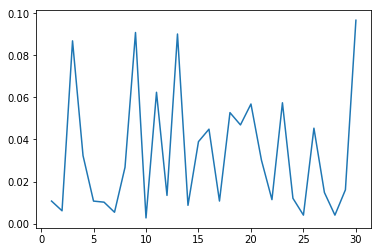

In [132]:
plt.plot([i for i in range(1,31)], em.pi)

In [102]:
em.pi.sum()

0.00066666666666666643

In [138]:
words = [line.strip() for line in open('vocab.nips.txt')]

p = em.p.T
for j in range(30):
    ind = np.argpartition(p[j,], - 10)[-10:]
    ind = ind[np.argsort(p[j, ind])][::-1] # sorted indices
    print("Topic " + str(j) + ":", ", ".join([words[i] for i in ind]))

Topic 0: sound, model, signal, auditory, target, frequency, system, component, response, visual
Topic 1: network, neuron, input, item, classifier, system, classification, set, rules, layer
Topic 2: model, data, network, algorithm, parameter, system, function, neural, learning, set
Topic 3: model, eye, system, movement, head, direction, position, cell, motor, network
Topic 4: component, information, distribution, order, approximation, algorithm, independent, function, learning, data
Topic 5: image, disparity, region, network, data, model, point, problem, images, local
Topic 6: network, neural, processor, simulation, system, parallel, data, model, computer, neuron
Topic 7: network, function, neural, input, threshold, weight, neuron, output, number, circuit
Topic 8: network, function, learning, weight, input, data, model, error, neural, training
Topic 9: network, learning, trajectory, algorithm, equation, gradient, neural, control, trajectories, input
Topic 10: model, cell, input, system,